# **Employee Burnout Prediction**

Employee burnout is a state of physical, emotional and mental exhaustion caused by excessive and prolonged stress. It can have serious consequences on an individual's well-being and can lead to decreased productivity and job performance. In today's fast-paced and constantly connected world, it is increasingly important to recognize and address the signs of burnout in order to maintain the health and well-being of employees.

we will be exploring the use of regression techniques to predict employee burnout. By analyzing a dataset containing various factors that may contribute to burnout such as workload, mental fatigue job and work-life balance, we can develop a model to identify individuals who may be at risk of burnout. By proactively addressing these risk factors, organizations can help prevent burnout and promote the well-being of their employees.

## Dataset: Are Your Employees Burning Out?
This [dataset](https://www.kaggle.com/datasets/blurredmachine/are-your-employees-burning-out?select=train.csv) consists of 9 columns as follows:

* **Employee ID:** The unique ID allocated for each employee **(example: fffe390032003000)**
* **Date of Joining:** The date-time when the employee has joined the organization **(example: 2008-12-30)**
* **Gender:** The gender of the employee **(Male/Female)**
* **Company Type:** The type of company where the employee is working **(Service/Product)**
* **WFH Setup Available:** Is the work from home facility available for the employee **(Yes/No)**
* **Designation:** The designation of the employee of work in the organization. In the **range of [0.0, 5.0]** bigger is higher designation.
* **Resource Allocation:** The amount of resource allocated to the employee to work, ie. number of working hours. In the **range of [1.0, 10.0]** (higher means
  more resource)
* **Mental Fatigue Score:** The level of fatigue mentally the employee is facing. In the **range of [0.0, 10.0]** where 0.0 means no fatigue and 10.0 means
  completely fatigue.
* **Burn Rate:** The value we need to predict for each employee telling the rate of Bur out while working. In the **range of [0.0, 1.0]** where the higher the
  value is more is the burn out.

### Importing Necessary Libraries

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### Loading Datset

In [ ]:
data = pd.read_excel("/content/employee_burnout_analysis-AI.xlsx")

### Data Overview

In [ ]:
data.shape

(22750, 9)

In [ ]:
# Display the first 5 rows of the dataframe
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [ ]:
# Display the last 5 rows of the dataframe
data.tail()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61


In [ ]:
data.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
data.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

### Exploratory Data Analysis

There are NaN values on our target ("Burn Rate") and also in Resource Allocation and Mental Fatigue Score columns. As we are going to perform supervised linear regression, our target variable is needed to do so. Therefore, this 1124 rows with NaN values must be dropped off of our dataframe.

In [ ]:
data.corr(numeric_only=True)['Burn Rate'][:-1]

Designation             0.737556
Resource Allocation     0.856278
Mental Fatigue Score    0.944546
Name: Burn Rate, dtype: float64

These two variables are strongly correlated with target variable, therefore , important to estimate it.

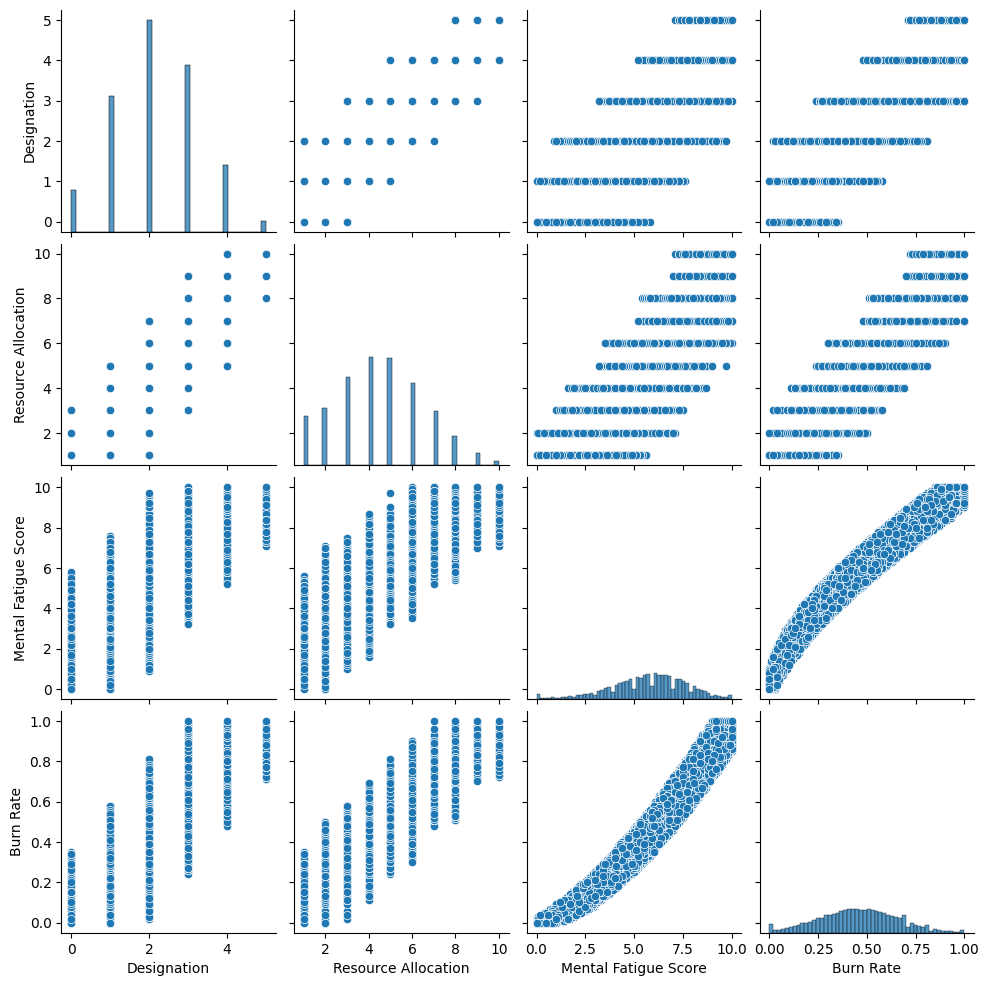

In [ ]:
sns.pairplot(data)
plt.show()

Drop off all observations with NaN values of our dataframe.

In [ ]:
data = data.dropna()

In [ ]:
data.shape

(18590, 9)

Analyzing what type of data is each variable.

In [ ]:
data.dtypes

Employee ID                     object
Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                      int64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object

The Employees ID doesn't provide any useful information. Therefore, they must be dropped.

In [ ]:
data=data.drop(columns=['Employee ID'])

Min date 2008-01-01 00:00:00
Max date 2008-12-31 00:00:00


<Axes: title={'center': 'Hired Employees in 2008'}, xlabel='Month', ylabel='Hired employees'>

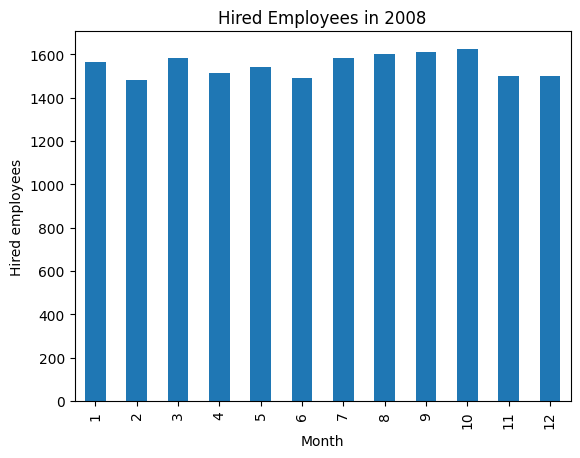

In [ ]:
print(f"Min date {data['Date of Joining'].min()}")
print(f"Max date {data['Date of Joining'].max()}")
data_month = data.copy()

data_month["Date of Joining"] = data_month['Date of Joining'].astype("datetime64[ns]")  # Specify time unit as nanoseconds
data_month["Date of Joining"].groupby(data_month['Date of Joining'].dt.month).count().plot(title = "Hired Employees in 2008", kind="bar", xlabel='Month', ylabel="Hired employees")

Index(['Date of Joining', 'Gender', 'Company Type', 'WFH Setup Available',
       'Designation', 'Resource Allocation', 'Mental Fatigue Score',
       'Burn Rate'],
      dtype='object')
Min date 2008-01-01 00:00:00
Max date 2008-12-31 00:00:00


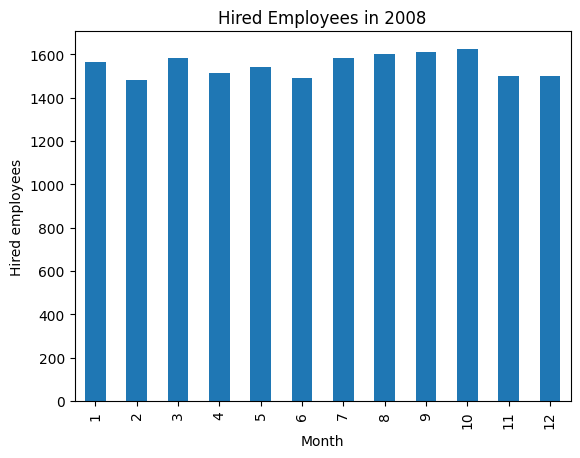

In [ ]:
print(data_month.columns)  # Check if 'Date of Joining' is in the columns

# Check if 'Date of Joining' exists before accessing
if 'Date of Joining' in data_month.columns:
    print(f"Min date {data_month['Date of Joining'].min()}")  # Use data_month instead of data
    print(f"Max date {data_month['Date of Joining'].max()}")

data_month = data.copy()
if data_month.empty:
    print("DataFrame is empty. Cannot plot.")
else:
    # Check again if 'Date of Joining' exists before modifying
    if 'Date of Joining' in data_month.columns:
        data_month["Date of Joining"] = data_month['Date of Joining'].astype("datetime64[ns]")
        data_month["Date of Joining"].groupby(data_month['Date of Joining'].dt.month).count().plot(title = "Hired Employees in 2008", kind="bar", xlabel='Month', ylabel="Hired employees")
    else:
        print("Column 'Date of Joining' not found. Cannot plot.")

Checking the correlation of Date of Joining with Target variable.

The date of joining is uniform distributed with values between 2008-01-01 and 2008-12-31. So in order to create a new feature which represents the labor seniority, we could create a variable with the days worked.

In [ ]:
data_2008 = pd.to_datetime(["2008-01-01"]*len(data))
# Specify time unit as nanoseconds when converting to datetime64
data["Days"] = data['Date of Joining'].astype("datetime64[ns]").sub(data_2008).dt.days
data.Days

0        273
1        334
3        307
4        205
5        330
        ... 
22743    349
22744    147
22746     18
22748      9
22749      5
Name: Days, Length: 18590, dtype: int64

In [ ]:
# Select only numeric columns before calculating correlation
numeric_data = data.select_dtypes(include=['number'])
correlation = numeric_data.corr()['Burn Rate']
print(correlation)

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64


We observed that there is no strong correlation between Date of Joining and Burn Rate.So, we are dropping the column Date of Joining.

In [ ]:
data = data.drop(columns=['Date of Joining','Days'])

In [ ]:
data

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Female,Service,No,2,3.0,3.8,0.16
1,Male,Service,Yes,1,2.0,5.0,0.36
3,Male,Service,Yes,1,1.0,2.6,0.20
4,Female,Service,No,3,7.0,6.9,0.52
5,Male,Product,Yes,2,4.0,3.6,0.29
...,...,...,...,...,...,...,...
22743,Female,Product,Yes,1,3.0,6.0,0.48
22744,Male,Product,No,3,7.0,6.2,0.54
22746,Female,Product,Yes,3,6.0,6.7,0.59
22748,Female,Service,No,2,5.0,5.9,0.52


Now analysing the categorical variables

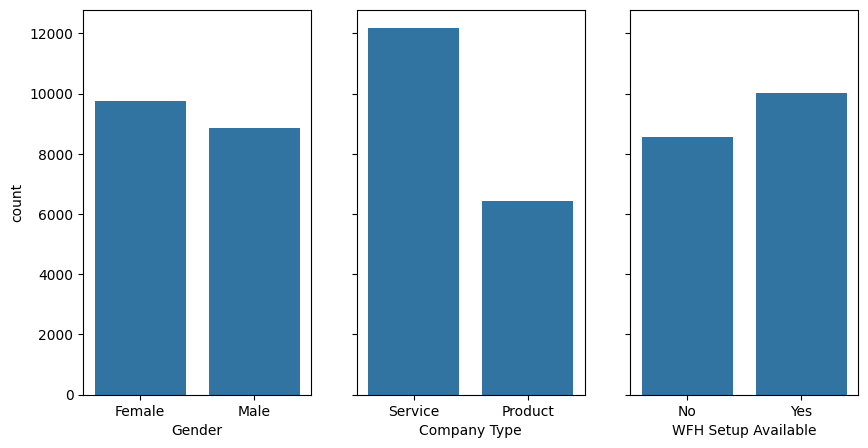

In [ ]:
cat_columns = data.select_dtypes(object).columns
fig, ax = plt.subplots(nrows=1, ncols=len(cat_columns), sharey=True, figsize=(10, 5))
for i, c in enumerate(cat_columns):
    sns.countplot(x=c, data=data, ax=ax[i])
plt.show()

The number of observations of each category on each variable is equally distributed, except to the Company_Type where the number of service jobs its almost twice that of product ones.

### One-Hot Encoding for categorical features

In [ ]:
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data['Company Type'] = encoder.fit_transform(data['Company Type'])
data['WFH Setup Available'] = encoder.fit_transform(data['WFH Setup Available'])

In [ ]:
data

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,0,1,0,2,3.0,3.8,0.16
1,1,1,1,1,2.0,5.0,0.36
3,1,1,1,1,1.0,2.6,0.20
4,0,1,0,3,7.0,6.9,0.52
5,1,0,1,2,4.0,3.6,0.29
...,...,...,...,...,...,...,...
22743,0,0,1,1,3.0,6.0,0.48
22744,1,0,0,3,7.0,6.2,0.54
22746,0,0,1,3,6.0,6.7,0.59
22748,0,1,0,2,5.0,5.9,0.52


Plotting Correlation Matrix

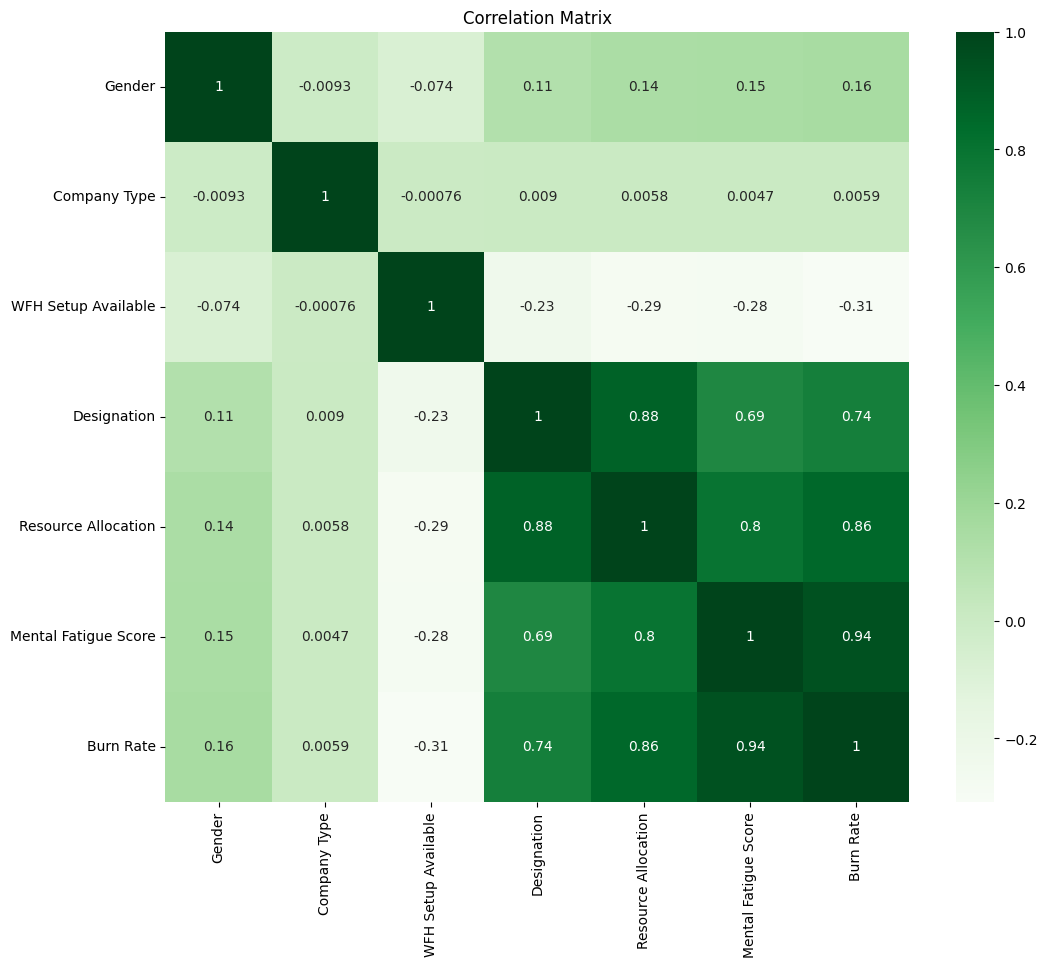

In [ ]:
plt.figure(figsize=(12,10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.Greens)
plt.title("Correlation Matrix")
plt.show()

### Preprocessing

In [ ]:
x = data.drop(columns=['Burn Rate'])

In [ ]:
x

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,0,1,0,2,3.0,3.8
1,1,1,1,1,2.0,5.0
3,1,1,1,1,1.0,2.6
4,0,1,0,3,7.0,6.9
5,1,0,1,2,4.0,3.6
...,...,...,...,...,...,...
22743,0,0,1,1,3.0,6.0
22744,1,0,0,3,7.0,6.2
22746,0,0,1,3,6.0,6.7
22748,0,1,0,2,5.0,5.9


In [ ]:
y = data['Burn Rate']

In [ ]:
y

0        0.16
1        0.36
3        0.20
4        0.52
5        0.29
         ... 
22743    0.48
22744    0.54
22746    0.59
22748    0.52
22749    0.61
Name: Burn Rate, Length: 18590, dtype: float64

In [ ]:
# Normalization
scaler=MinMaxScaler()  #object
x=scaler.fit_transform(x)

In [ ]:
x

array([[0.        , 1.        , 0.        , 0.4       , 0.22222222,
        0.38      ],
       [1.        , 1.        , 1.        , 0.2       , 0.11111111,
        0.5       ],
       [1.        , 1.        , 1.        , 0.2       , 0.        ,
        0.26      ],
       ...,
       [0.        , 0.        , 1.        , 0.6       , 0.55555556,
        0.67      ],
       [0.        , 1.        , 0.        , 0.4       , 0.44444444,
        0.59      ],
       [1.        , 0.        , 0.        , 0.6       , 0.55555556,
        0.78      ]])

In [ ]:
# training and testing sets are divided into 70% and 30% respectively
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,shuffle=True,random_state=10)

In [ ]:
xtrain

array([[1.        , 0.        , 0.        , 0.4       , 0.44444444,
        0.84      ],
       [0.        , 1.        , 0.        , 0.6       , 0.55555556,
        0.79      ],
       [0.        , 1.        , 1.        , 0.4       , 0.44444444,
        0.6       ],
       ...,
       [1.        , 0.        , 0.        , 0.4       , 0.33333333,
        0.67      ],
       [1.        , 1.        , 1.        , 0.4       , 0.33333333,
        0.37      ],
       [1.        , 1.        , 0.        , 0.4       , 0.33333333,
        0.58      ]])

## Model Building

### Linear Regression

In [ ]:
Linear_Regression_model = LinearRegression()
Linear_Regression_model.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
predict1=Linear_Regression_model.predict(xtest)
predict1

array([0.2515429 , 0.58752704, 0.33463836, ..., 0.42462187, 0.3185082 ,
       0.36588413])

In [ ]:
print("Linear Regression Model Performance Metrics:")
mse = mean_squared_error(ytest, predict1) # Calculate mean squared error
rmse = mean_squared_error(ytest, predict1, squared = False) # Calculate root mean squared error
mae = mean_absolute_error(ytest, predict1) # Calculate mean absolute error
r2 = r2_score(ytest, predict1) # Calculate R-squared score
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print(f'Model Accuracy : {r2*100}') # Print model accuracy as percentage

Linear Regression Model Performance Metrics:
Mean Squared Error: 0.0030030382328273503
Root Mean Squared Error: 0.054799983876159586
Mean Absolute Error: 0.044813754586204374
R-squared: 0.922324328791648
Model Accuracy : 92.2324328791648


Based on the evaluation metrics, the Linear Regression model appears to be the best model for predicting burnout analysis.

It has the lowest mean squared error, root mean squared error, and mean absolute error, indicating good accuracy of 92.23% in its predictions. Additionally, it has the highest R-squared score, indicating a good fit to the data and explaining a higher proportion of the variance in the target variable.

So we are choosing this model for deployment.